In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScalerrdScaler  

df=pd.read_csv('MRec.csv')
df.head()

,Age,Gender,Mood,Genre
0,18.0,F,Happy,Rock
1,18.0,F,Gloomy,Instrumental
2,18.0,F,Stressed,Pop
3,18.0,F,Relaxing,Pop
4,18.0,F,Energetic,Hiphop


In [36]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))
df.describe()

Age : [18. 19. 20. 21. 22. 23. 24. 25. 27. 28. nan 29. 30. 31. 32. 33. 34. 36.
 37. 39. 42. 45. 47. 49. 55.]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Instrumental' 'Pop' 'Hiphop' 'EDM' 'Indie/Acoustic' 'Country'
 'Blues']


,Age
count,326.000000
mean,28.561350
std,8.474445
min,18.000000
25%,22.000000
50%,25.000000
75%,33.000000
max,55.000000


In [37]:
#Checking for null values to fill
df.isnull().sum()

Age       4
Gender    0
Mood      0
Genre     0
dtype: int64

In [38]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)

df.head(7)


,Age,Gender,Mood,Genre
0,18.0,1,1,Rock
1,18.0,1,2,Instrumental
2,18.0,1,3,Pop
3,18.0,1,4,Pop
4,18.0,1,5,Hiphop
5,19.0,0,1,Pop
6,19.0,0,2,EDM


In [39]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(330, 4)


In [40]:
#Replacing NaN instances with mean values

columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,Age,Gender,Mood,Genre
0,18.0,1,1,Rock
1,18.0,1,2,Instrumental
2,18.0,1,3,Pop
3,18.0,1,4,Pop
4,18.0,1,5,Hiphop


In [29]:
#Checking for null values again
df.isnull().sum()

Age       0
Gender    0
Mood      0
Genre     0
dtype: int64

Text(0.5, 1.0, 'Count of demographics in dataset:')

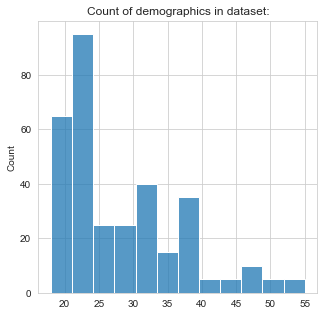

In [41]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

<AxesSubplot:xlabel='Age', ylabel='Genre'>

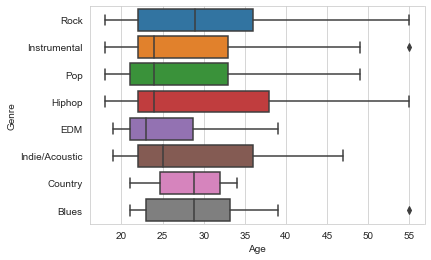

In [42]:
sns.boxplot(x='Age',y='Genre',data=df)

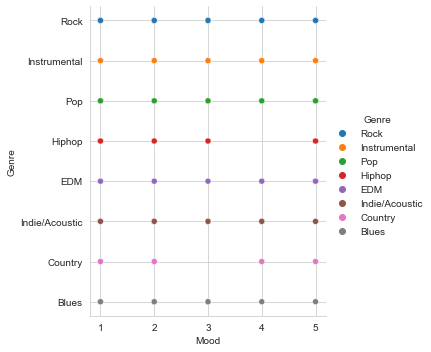

In [43]:
sns.set_style("whitegrid");
sns.relplot(x='Mood',y='Genre',hue='Genre', data=df)
plt.show();

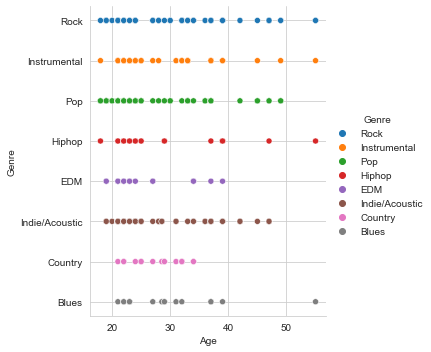

In [44]:
sns.set_style("whitegrid");
sns.relplot(x='Age',y='Genre',hue='Genre', data=df)
plt.show();

In [50]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

array(['Indie/Acoustic', 'Pop', 'Indie/Acoustic', 'Pop', 'Rock'],
      dtype=object)

In [32]:
#Replacing categorical data with integer values

df['Genre'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[10,20,30,40,50,60,70,80], inplace=True)
df.head(7)

,Age,Gender,Mood,Genre
0,18.0,1,1,20
1,18.0,1,2,40
2,18.0,1,3,10
3,18.0,1,4,10
4,18.0,1,5,70
5,19.0,0,1,10
6,19.0,0,2,50


<AxesSubplot:>

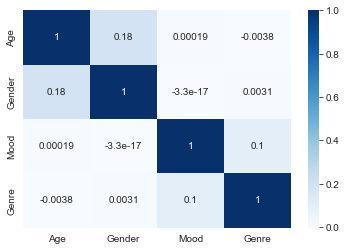

In [33]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

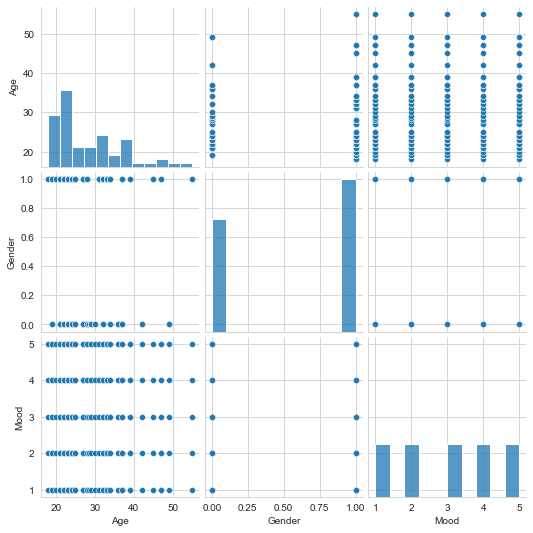

In [51]:
sns.pairplot(df)

In [52]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#print(df['Age'].quantile(0.5))
print(
    (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
)
#df['Age'].describe()

       Age  Gender  Genre   Mood
0    False   False  False  False
1    False   False  False  False
2    False   False  False  False
3    False   False  False  False
4    False   False  False  False
..     ...     ...    ...    ...
325   True   False  False  False
326   True   False  False  False
327   True   False  False  False
328   True   False  False  False
329   True   False  False  False

[330 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_4820\1504799766.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
